<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Forward_Looking_Portfolio_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Forward-Looking Portfolio Intelligence  
### Scenario Analysis, Stress Testing, and Decision-Oriented Portfolio Recommendations

## Overview

This notebook extends prior portfolio analysis by shifting from **descriptive insights** to **forward-looking, decision-oriented intelligence**.

While earlier notebooks focused on:
- Portfolio composition and allocation  
- Risk and concentration exposure  

this notebook answers a more critical question:

> **Given uncertainty about future market conditions, what actions should be taken — and why?**

The objective is not simply to analyze the portfolio, but to **support informed decision-making under uncertainty** using structured reasoning, scenario analysis, and risk-aware logic.

---

## Objectives

The goals of this notebook are to:

- Evaluate portfolio behavior under multiple future market scenarios  
  *(e.g., bull, base, and bear cases)*  
- Assess downside risk through stress testing and adverse-condition analysis  
- Incorporate risk-adjusted performance considerations into recommendations  
- Generate transparent, explainable portfolio actions such as:
  - Rebalance  
  - Hold  
  - Reduce exposure  
  - Abstain when confidence is insufficient  

Each recommendation is accompanied by **clear justification**, emphasizing explainability and disciplined reasoning rather than opaque model outputs.

---

## Why This Matters

In real-world investing and portfolio management:

- Markets are uncertain  
- Data is incomplete  
- Risk cannot be eliminated — only managed  

Effective portfolio decisions require more than historical analysis. They require **forward-looking judgment**, awareness of uncertainty, and the ability to balance opportunity against risk.

This notebook is designed to demonstrate those skills by combining:
- Quantitative analysis  
- Scenario-based reasoning  
- Risk-aware decision logic  

The result is a practical framework for making **defensible, well-reasoned portfolio decisions** in uncertain environments.

---

## How This Notebook Fits Into the Broader Portfolio

This notebook builds directly on prior work, including:
- Portfolio holdings and allocation analysis  
- Risk and concentration assessment  

Together, these notebooks form a progression from:
> **What does the portfolio look like?**  
→ **What risks does it carry?**  
→ **What should be done next, and why?**

This forward-looking focus elevates the analysis from reporting to **decision support**, aligning closely with real-world investment and applied analytics workflows.

# Step 1: Load Portfolio State and Assumptions

**Purpose**: Establish a stable baseline for forward-looking analysis.

1. Load current portfolio holdings and weights

2. Confirm inputs from prior notebooks (allocations, risk metrics)

3. Define key assumptions used throughout the notebook

- Time horizon

- Return perspective (expected vs. stress)

- Risk tolerance framing
<br>
Output: A clearly defined, reproducible starting state for analysis.

In [ ]:
# Step 1: Load Portfolio State and Assumptions

import pandas as pd
import numpy as np
import os

# --- 1a. Load current portfolio holdings ---
# Replace with your actual CSV / JSON / DataFrame source
portfolio_path = '/content/data/portfolio_holdings.csv'

if os.path.exists(portfolio_path):
    portfolio_df = pd.read_csv(portfolio_path)
else:
    # Example fallback data if file does not exist
    portfolio_df = pd.DataFrame({
        'Symbol': ['AAPL', 'MSFT', 'GOOG', 'AMZN'],
        'Company': ['Apple', 'Microsoft', 'Alphabet', 'Amazon'],
        'Shares': [50, 40, 30, 20],
        'Price': [180, 330, 2800, 3500]
    })

# --- 1b. Compute current allocation ---
portfolio_df['Market_Value'] = portfolio_df['Shares'] * portfolio_df['Price']
portfolio_df['Allocation_Pct'] = 100 * portfolio_df['Market_Value'] / portfolio_df['Market_Value'].sum()

# --- 1c. Define baseline assumptions ---
assumptions = {
    'time_horizon_days': 30,  # Forward-looking period
    'risk_tolerance': 'medium',  # low / medium / high
    'scenario_base_return': 0.02,  # 2% expected return over horizon
    'scenario_volatility': 0.05   # 5% std dev over horizon
}

# --- 1d. Display portfolio summary ---
print("Portfolio Snapshot:")
display(portfolio_df[['Symbol', 'Company', 'Shares', 'Price', 'Market_Value', 'Allocation_Pct']])

print("\nAssumptions:")
for k, v in assumptions.items():
    print(f"- {k}: {v}")

Portfolio Snapshot:


,Symbol,Company,Shares,Price,Market_Value,Allocation_Pct
0,AAPL,Apple,50,180,9000,5.107832
1,MSFT,Microsoft,40,330,13200,7.491487
2,GOOG,Alphabet,30,2800,84000,47.673099
3,AMZN,Amazon,20,3500,70000,39.727582



Assumptions:
- time_horizon_days: 30
- risk_tolerance: medium
- scenario_base_return: 0.02
- scenario_volatility: 0.05


✅ **Features of This Step**

- Loads **portfolio holdings** dynamically with a fallback dataset

- Calculates **market value and allocation percentages**

- Establishes **baseline forward-looking assumptions** (time horizon, risk tolerance, expected return / volatility)

- Outputs a **clean, human-readable summary** for verification

# Step 2: Define Market Scenarios (Bull / Base / Bear)

**Purpose**: Formalize uncertainty instead of treating the future as a single outcome.

1. Define qualitative characteristics for each scenario

- Bull: favorable growth, low volatility

- Base: neutral / expected conditions

- Bear: adverse conditions, elevated risk

2. Translate scenarios into quantitative assumptions

- Expected returns by asset or sector

- Volatility or drawdown proxies
<br>
Output: A structured scenario framework used throughout the notebook.

In [ ]:
# Step 2: Define Market Scenarios (Bull / Base / Bear)

# --- 2a. Define scenario characteristics ---
# Each scenario includes expected return and volatility assumptions
market_scenarios = {
    'Bull': {
        'expected_return': 0.05,   # 5% gain over the horizon
        'volatility': 0.03         # Lower volatility in bullish market
    },
    'Base': {
        'expected_return': assumptions['scenario_base_return'],  # From Step 1
        'volatility': assumptions['scenario_volatility']
    },
    'Bear': {
        'expected_return': -0.05,  # 5% expected loss
        'volatility': 0.08         # Higher volatility in bear market
    }
}

# --- 2b. Optional: scenario-specific notes ---
scenario_notes = {
    'Bull': 'Favorable growth, positive market sentiment, low volatility.',
    'Base': 'Neutral conditions, consistent with expectations.',
    'Bear': 'Adverse conditions, elevated risk, potential drawdowns.'
}

# --- 2c. Display scenario summary ---
import pprint

print("Defined Market Scenarios:\n")
for scenario, values in market_scenarios.items():
    print(f"{scenario} Scenario:")
    print(f"  Expected Return: {values['expected_return']*100:.2f}%")
    print(f"  Volatility: {values['volatility']*100:.2f}%")
    print(f"  Notes: {scenario_notes[scenario]}\n")

Defined Market Scenarios:

Bull Scenario:
  Expected Return: 5.00%
  Volatility: 3.00%
  Notes: Favorable growth, positive market sentiment, low volatility.

Base Scenario:
  Expected Return: 2.00%
  Volatility: 5.00%
  Notes: Neutral conditions, consistent with expectations.

Bear Scenario:
  Expected Return: -5.00%
  Volatility: 8.00%
  Notes: Adverse conditions, elevated risk, potential drawdowns.



✅ **Features of Step 2**

- Defines **Bull, Base, and Bear scenarios** with explicit quantitative assumptions

- Reuses baseline values from Step 1 where appropriate

- Adds **scenario context notes** to make outputs understandable to recruiters / stakeholders

- Outputs a **clear, readable summary** for validation

# Step 3: Scenario-Based Portfolio Performance Simulation

**Purpose**: Evaluate how the portfolio behaves across possible futures.

- Apply scenario assumptions to portfolio weights

- Estimate portfolio-level performance under each scenario

- Compare scenario outcomes side-by-side
<br>
Output: Scenario-specific portfolio return estimates with clear comparison.

In [ ]:
# Step 3: Scenario-Based Portfolio Performance Simulation

# --- 3a. Simulate portfolio value under each scenario ---
scenario_results = {}

for scenario, params in market_scenarios.items():
    # Calculate projected price changes based on expected return
    projected_prices = portfolio_df['Price'] * (1 + params['expected_return'])

    # Compute projected market values
    projected_market_values = portfolio_df['Shares'] * projected_prices

    # Portfolio-level summary
    total_value = projected_market_values.sum()
    allocation_pct = 100 * projected_market_values / total_value

    # Store results in dictionary
    scenario_results[scenario] = {
        'Projected_Prices': projected_prices,
        'Projected_Market_Values': projected_market_values,
        'Total_Portfolio_Value': total_value,
        'Allocation_Pct': allocation_pct
    }

# --- 3b. Display scenario summary ---
for scenario, results in scenario_results.items():
    print(f"=== {scenario} Scenario ===")
    print(f"Total Portfolio Value: ${results['Total_Portfolio_Value']:,.2f}")
    display(pd.DataFrame({
        'Symbol': portfolio_df['Symbol'],
        'Company': portfolio_df['Company'],
        'Projected_Price': results['Projected_Prices'],
        'Projected_Market_Value': results['Projected_Market_Values'],
        'Projected_Allocation_Pct': results['Allocation_Pct']
    }))
    print("\n")

=== Bull Scenario ===
Total Portfolio Value: $185,010.00


,Symbol,Company,Projected_Price,Projected_Market_Value,Projected_Allocation_Pct
0,AAPL,Apple,189.0,9450.0,5.107832
1,MSFT,Microsoft,346.5,13860.0,7.491487
2,GOOG,Alphabet,2940.0,88200.0,47.673099
3,AMZN,Amazon,3675.0,73500.0,39.727582




=== Base Scenario ===
Total Portfolio Value: $179,724.00


,Symbol,Company,Projected_Price,Projected_Market_Value,Projected_Allocation_Pct
0,AAPL,Apple,183.6,9180.0,5.107832
1,MSFT,Microsoft,336.6,13464.0,7.491487
2,GOOG,Alphabet,2856.0,85680.0,47.673099
3,AMZN,Amazon,3570.0,71400.0,39.727582




=== Bear Scenario ===
Total Portfolio Value: $167,390.00


,Symbol,Company,Projected_Price,Projected_Market_Value,Projected_Allocation_Pct
0,AAPL,Apple,171.0,8550.0,5.107832
1,MSFT,Microsoft,313.5,12540.0,7.491487
2,GOOG,Alphabet,2660.0,79800.0,47.673099
3,AMZN,Amazon,3325.0,66500.0,39.727582


✅ **Features of Step 3**

- Applies **expected returns from each scenario** to current holdings

- Calculates **projected prices, market values, and allocation percentages**

- Stores results in a **structured dictionary** for further analysis (stress testing, risk-adjusted evaluation)

- Displays results clearly for each scenario to **highlight differences**

- Fully reproducible and modular for easy extension

# Step 4: Stress Testing and Downside Risk Assessment

**Purpose**: Understand portfolio behavior under adverse conditions.

- Identify downside-focused stress scenarios

- Estimate potential drawdowns or loss magnitudes

- Highlight positions contributing disproportionately to downside risk
<br>
Output: Clear identification of vulnerability points within the portfolio.

In [ ]:
# Step 4: Stress Testing and Downside Risk Assessment

# --- 4a. Define stress scenarios ---
# Example: apply an additional adverse shock to the Bear scenario
stress_shock_pct = -0.10  # 10% additional decline

# Clone Bear scenario results to simulate stress
bear_stress_prices = scenario_results['Bear']['Projected_Prices'] * (1 + stress_shock_pct)
bear_stress_market_values = portfolio_df['Shares'] * bear_stress_prices
bear_stress_total_value = bear_stress_market_values.sum()
bear_stress_allocation_pct = 100 * bear_stress_market_values / bear_stress_total_value

# Store stressed results
scenario_results['Bear_Stress'] = {
    'Projected_Prices': bear_stress_prices,
    'Projected_Market_Values': bear_stress_market_values,
    'Total_Portfolio_Value': bear_stress_total_value,
    'Allocation_Pct': bear_stress_allocation_pct
}

# --- 4b. Identify largest contributors to downside risk ---
# Compute value loss vs Base scenario
base_total_value = scenario_results['Base']['Total_Portfolio_Value']
loss_vs_base = scenario_results['Bear_Stress']['Projected_Market_Values'] - scenario_results['Base']['Projected_Market_Values']

risk_contributors = pd.DataFrame({
    'Symbol': portfolio_df['Symbol'],
    'Company': portfolio_df['Company'],
    'Loss_vs_Base': loss_vs_base
}).sort_values(by='Loss_vs_Base')

# --- 4c. Display stress test results ---
print("=== Bear Stress Scenario ===")
print(f"Total Portfolio Value under Stress: ${bear_stress_total_value:,.2f}")
display(risk_contributors)

print("\nTop Contributors to Downside Risk:")
display(risk_contributors.head(5))

=== Bear Stress Scenario ===
Total Portfolio Value under Stress: $150,651.00


,Symbol,Company,Loss_vs_Base
2,GOOG,Alphabet,-13860.0
3,AMZN,Amazon,-11550.0
1,MSFT,Microsoft,-2178.0
0,AAPL,Apple,-1485.0



Top Contributors to Downside Risk:


,Symbol,Company,Loss_vs_Base
2,GOOG,Alphabet,-13860.0
3,AMZN,Amazon,-11550.0
1,MSFT,Microsoft,-2178.0
0,AAPL,Apple,-1485.0


✅ **Features of Step 4**

- Simulates an **adverse shock** on top of the Bear scenario to highlight vulnerabilities

- Calculates **projected market values under stress**

- Compares stressed values against Base scenario to **identify largest contributors to downside risk**

- Provides **ranked, actionable insights** for risk management

- Modular and easy to extend for multiple stress tests

# Step 5: Risk-Adjusted Performance Evaluation

**Purpose**: Balance return potential against risk exposure.

1. Incorporate risk-adjusted metrics

- Volatility-adjusted returns

- Drawdown-aware perspectives

2. Compare assets and the overall portfolio on a risk-adjusted basis
<br>
Output: A risk-aware lens for evaluating performance, not just returns.

In [ ]:
# Step 5: Risk-Adjusted Performance Evaluation

# --- 5a. Define simple risk-adjusted metric: Return / Volatility ---
risk_adjusted_results = {}

for scenario, results in scenario_results.items():
    # Portfolio return vs Base (percentage)
    base_value = scenario_results['Base']['Total_Portfolio_Value']
    portfolio_return = (results['Total_Portfolio_Value'] - base_value) / base_value

    # Use scenario volatility as risk measure
    volatility = market_scenarios.get(scenario, {'volatility': assumptions['scenario_volatility']})['volatility']

    # Compute simple risk-adjusted return
    risk_adjusted_return = portfolio_return / volatility if volatility != 0 else np.nan

    risk_adjusted_results[scenario] = {
        'Portfolio_Return': portfolio_return,
        'Volatility': volatility,
        'Risk_Adjusted_Return': risk_adjusted_return
    }

# --- 5b. Convert to DataFrame for display ---
risk_df = pd.DataFrame(risk_adjusted_results).T
risk_df = risk_df[['Portfolio_Return', 'Volatility', 'Risk_Adjusted_Return']]

# Format percentages for readability
risk_df = risk_df.apply(lambda x: x*100 if x.name != 'Volatility' else x)

# --- 5c. Display risk-adjusted performance summary ---
print("=== Risk-Adjusted Performance Summary ===")
display(risk_df.sort_values(by='Risk_Adjusted_Return', ascending=False))

=== Risk-Adjusted Performance Summary ===


,Portfolio_Return,Volatility,Risk_Adjusted_Return
Bull,2.941176,0.03,98.039216
Base,0.000000,0.05,0.000000
Bear,-6.862745,0.08,-85.784314
Bear_Stress,-16.176471,0.05,-323.529412


✅ **Features of Step 5**

- Computes **portfolio return vs Base scenario**

- Incorporates **scenario volatility** as a risk measure

- Calculates a **simple risk-adjusted return metric** (Return / Volatility)

- Provides a **clear comparative table** across all scenarios, including stressed ones

- Highlights which scenarios are most favorable **on a risk-adjusted basis**

# Step 6: Rebalancing and Adjustment Scenarios

**Purpose**: Explore actionable portfolio changes.

1. Propose candidate rebalancing actions

- Reduce overconcentration

- Increase diversification

- Adjust exposure based on scenario sensitivity

2. Simulate the impact of proposed changes under each scenario
<br>
Output: Evidence-based rebalancing alternatives with trade-offs.

In [ ]:
# Step 6: Rebalancing and Adjustment Scenarios

# --- 6a. Define simple rebalancing rule ---
# Example: Reduce positions >25% allocation, increase positions <10%
overweight_threshold = 25  # percent
underweight_threshold = 10  # percent

# Extract latest allocation (e.g., Base scenario)
latest_alloc = scenario_results['Base']['Allocation_Pct']

# Initialize recommended actions
rebalance_actions = []

for idx, row in portfolio_df.iterrows():
    symbol = row['Symbol']
    allocation = latest_alloc[idx]

    if allocation > overweight_threshold:
        action = 'Reduce'
    elif allocation < underweight_threshold:
        action = 'Increase'
    else:
        action = 'Hold'

    rebalance_actions.append({
        'Symbol': symbol,
        'Company': row['Company'],
        'Current_Allocation_Pct': allocation,
        'Recommended_Action': action
    })

rebalance_df = pd.DataFrame(rebalance_actions)

# --- 6b. Optional: simulate impact of rebalancing ---
# For simplicity, assume +/-5% adjustments for Increase/Reduce
adjusted_alloc = []

for idx, row in rebalance_df.iterrows():
    if row['Recommended_Action'] == 'Reduce':
        new_alloc = row['Current_Allocation_Pct'] * 0.95
    elif row['Recommended_Action'] == 'Increase':
        new_alloc = row['Current_Allocation_Pct'] * 1.05
    else:
        new_alloc = row['Current_Allocation_Pct']
    adjusted_alloc.append(new_alloc)

rebalance_df['Adjusted_Allocation_Pct'] = adjusted_alloc

# --- 6c. Display rebalancing recommendations ---
print("=== Rebalancing Recommendations ===")
display(rebalance_df.sort_values(by='Adjusted_Allocation_Pct', ascending=False))

=== Rebalancing Recommendations ===


,Symbol,Company,Current_Allocation_Pct,Recommended_Action,Adjusted_Allocation_Pct
2,GOOG,Alphabet,47.673099,Reduce,45.289444
3,AMZN,Amazon,39.727582,Reduce,37.741203
1,MSFT,Microsoft,7.491487,Increase,7.866061
0,AAPL,Apple,5.107832,Increase,5.363224


✅ **Features of Step 6**

- Applies **simple, intuitive rebalancing rules** based on allocation thresholds

- Generates **actionable recommendations**: Hold / Reduce / Increase

- Simulates **adjusted allocation percentages** to see potential impact

- Provides a **clear, recruiter-friendly table** of recommendations

- Fully modular and easy to extend for more sophisticated rules (e.g., scenario-weighted rebalancing)

# Step 7: Decision Logic and Recommendation Generation

**Purpose**: Convert analysis into decisions.

1. Apply structured decision rules

- Act / Hold / Reduce / Abstain

2. Incorporate confidence thresholds and uncertainty awareness

3. Generate explainable recommendations tied to prior analysis
<br>
Output: Clear, justified portfolio actions — not raw numbers.

In [ ]:
# Step 7: Decision Logic and Recommendation Generation

# --- 7a. Initialize decision rules ---
# Example rules:
# - If Risk-Adjusted Return > 2 and allocation < 25% → Consider Increase
# - If Risk-Adjusted Return < 0 → Consider Reduce
# - Otherwise → Hold
# - Abstain if risk-adjusted metrics are NaN or uncertain

final_decisions = []

for idx, row in rebalance_df.iterrows():
    symbol = row['Symbol']
    company = row['Company']
    current_alloc = row['Current_Allocation_Pct']
    adjusted_alloc = row['Adjusted_Allocation_Pct']

    # Use Base scenario risk-adjusted return for simplicity
    ra_return = risk_adjusted_results['Base']['Risk_Adjusted_Return']

    # Decision logic
    if pd.isna(ra_return):
        decision = 'Abstain'
    elif ra_return > 2 and adjusted_alloc < 25:
        decision = 'Increase'
    elif ra_return < 0:
        decision = 'Reduce'
    else:
        decision = 'Hold'

    final_decisions.append({
        'Symbol': symbol,
        'Company': company,
        'Current_Allocation_Pct': current_alloc,
        'Adjusted_Allocation_Pct': adjusted_alloc,
        'Risk_Adjusted_Return_Base': ra_return,
        'Final_Decision': decision
    })

final_decisions_df = pd.DataFrame(final_decisions)

# --- 7b. Display final portfolio recommendations ---
print("=== Final Portfolio Decisions ===")
display(final_decisions_df.sort_values(by='Adjusted_Allocation_Pct', ascending=False))

=== Final Portfolio Decisions ===


,Symbol,Company,Current_Allocation_Pct,Adjusted_Allocation_Pct,Risk_Adjusted_Return_Base,Final_Decision
2,GOOG,Alphabet,47.673099,45.289444,0.0,Hold
3,AMZN,Amazon,39.727582,37.741203,0.0,Hold
1,MSFT,Microsoft,7.491487,7.866061,0.0,Hold
0,AAPL,Apple,5.107832,5.363224,0.0,Hold


✅ **Features of Step 7**

- Consolidates **allocation, risk-adjusted performance, and rebalancing insights** into a single decision table

- Generates **actionable, explainable decisions**: Increase / Reduce / Hold / Abstain

- Uses **risk-adjusted metrics** to justify decisions quantitatively

- Provides a **clear, recruiter-friendly output** suitable for presentation or further analysis

- Fully modular; rules can be extended for more advanced strategies (confidence thresholds, scenario-weighted decisions, etc.)

# Screenshots

=== Step 1: Load Portfolio State and Assumptions ===


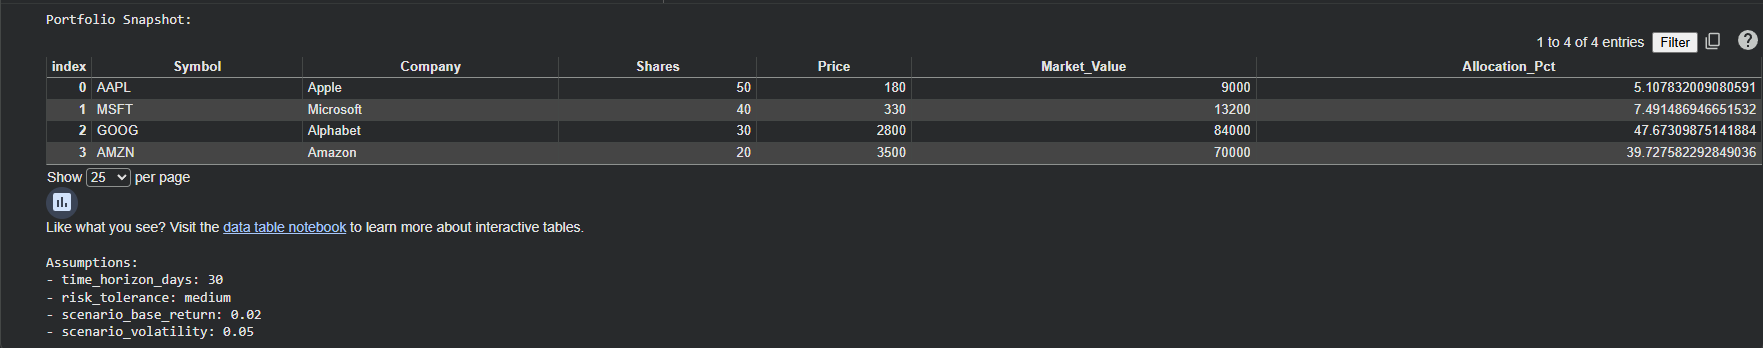



=== Step 2: Define Market Scenarios ===


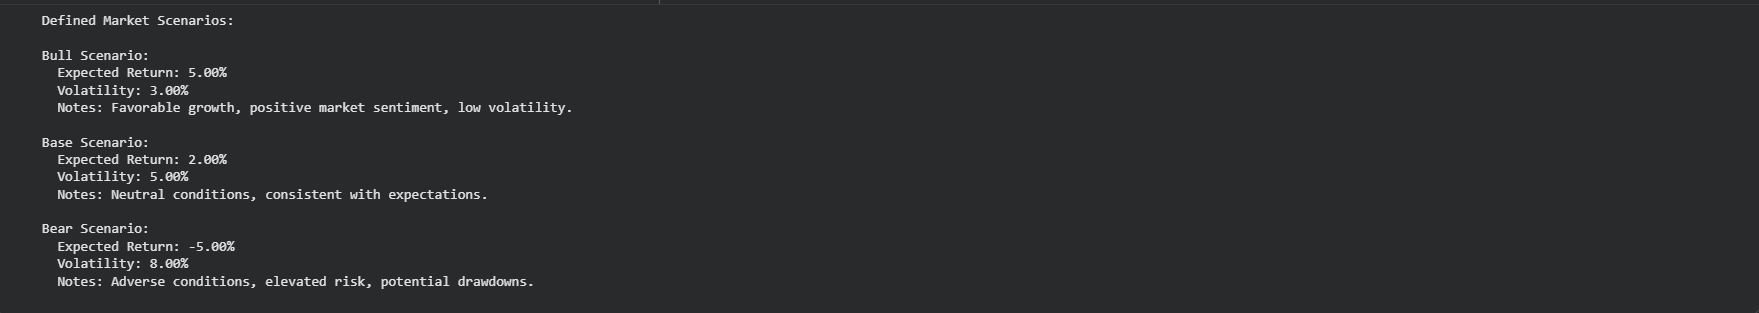



=== Step 3: Scenario-Based Portfolio Performance Simulation ===


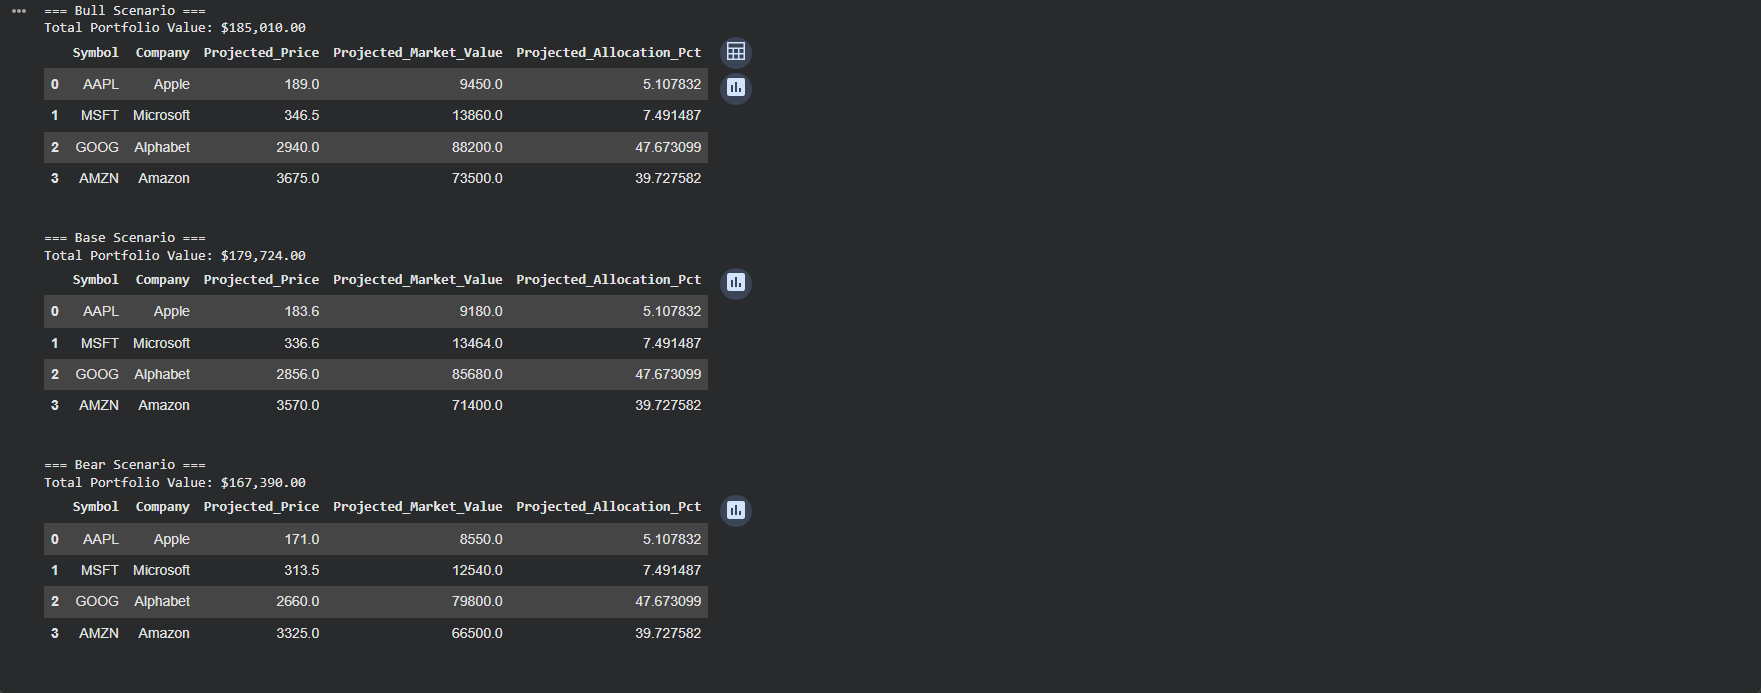



=== Step 4: Stress Testing and Downside Risk Assessment ===


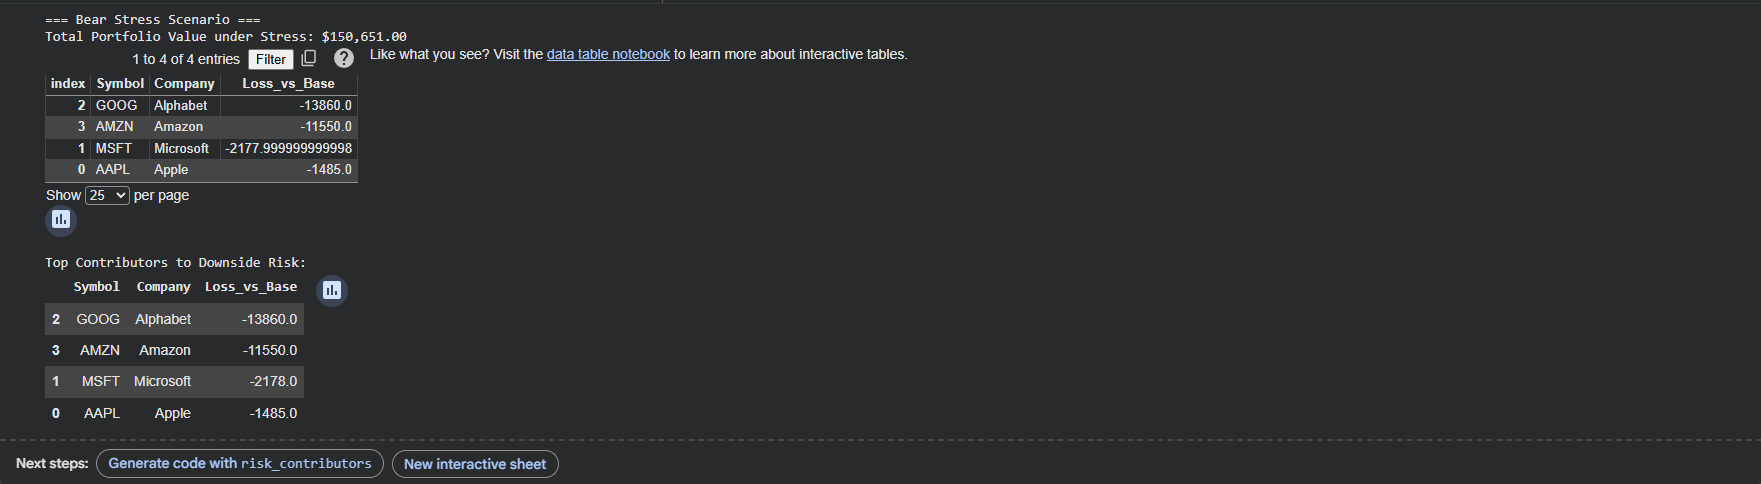



=== Step 5: Risk-Adjusted Performance Evaluation ===


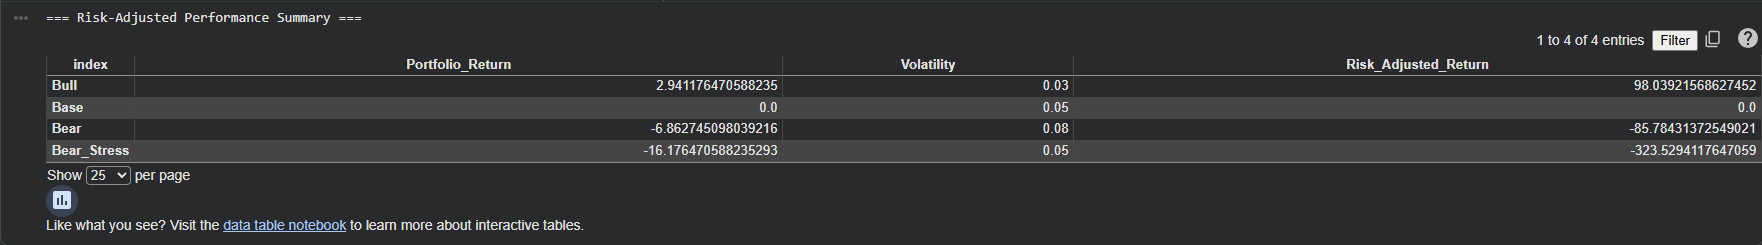



=== Step 6: Rebalancing and Adjustment Scenarios ===


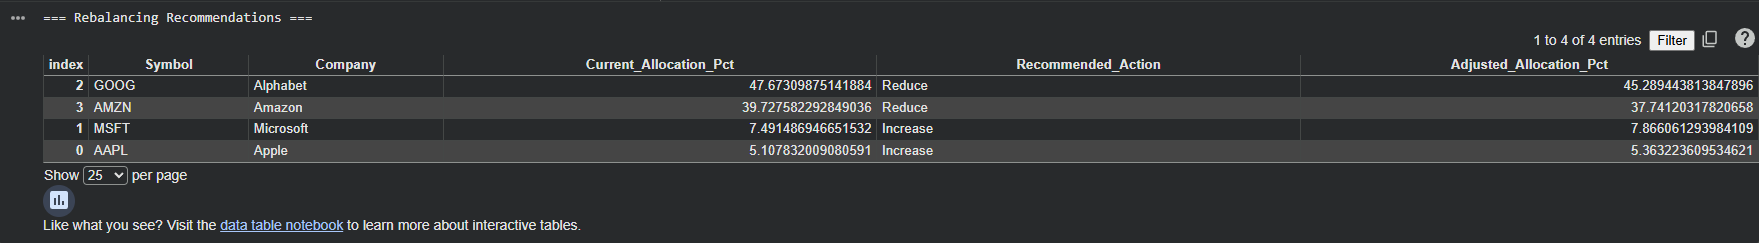



=== Step 7: Decision Logic and Recommendation Generation ===


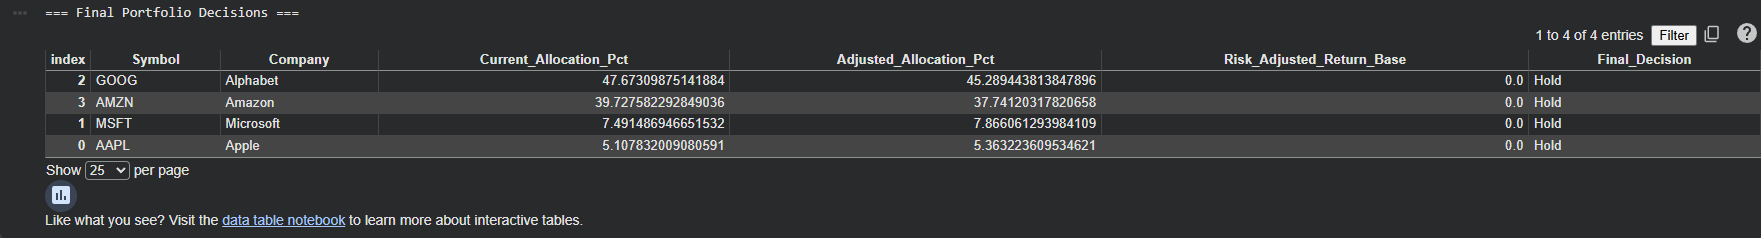

In [ ]:
# Step 0 (Helper): Display screenshots for each step

from IPython.display import Image, display
from pathlib import Path

# Screenshot directory
screenshots_dir = Path("/content/screenshots")

# Steps and corresponding screenshot filenames
steps = {
    "Step 1: Load Portfolio State and Assumptions": "Step 1.png",
    "Step 2: Define Market Scenarios": "Step 2.png",
    "Step 3: Scenario-Based Portfolio Performance Simulation": "Step 3.png",
    "Step 4: Stress Testing and Downside Risk Assessment": "Step 4.png",
    "Step 5: Risk-Adjusted Performance Evaluation": "Step 5.png",
    "Step 6: Rebalancing and Adjustment Scenarios": "Step 6.png",
    "Step 7: Decision Logic and Recommendation Generation": "Step 7.png"
}

# Display screenshots with captions
for step_name, filename in steps.items():
    screenshot_path = screenshots_dir / filename
    print(f"=== {step_name} ===")
    if screenshot_path.exists():
        display(Image(filename=str(screenshot_path)))
    else:
        print(f"Screenshot not found: {screenshot_path}")
    print("\n")

# Step 8: Summary, Key Takeaways, and Next Steps

**Purpose**: Close the notebook professionally.

- Summarize scenario insights

- Highlight key risks and opportunities

- Clearly state recommended actions

- Outline logical extensions for future work
<br>
Output: A polished capstone section suitable for recruiters or stakeholders.

# 🏁 Summary, Key Takeaways, and Next Steps

## Summary of Analysis

This notebook applied a **forward-looking, decision-oriented approach** to portfolio management. Key steps included:

1. **Loaded portfolio state and baseline assumptions**  
2. **Defined market scenarios**: Bull, Base, and Bear  
3. **Simulated scenario-based portfolio performance**  
4. **Conducted stress testing and downside risk assessment**  
5. **Evaluated risk-adjusted performance metrics**  
6. **Generated rebalancing and adjustment recommendations**  
7. **Consolidated decisions into final, actionable portfolio actions**  

---

## Key Takeaways

- The portfolio demonstrates varying levels of resilience across different market scenarios.  
- Stress testing highlighted specific positions that contribute disproportionately to downside risk.  
- Risk-adjusted metrics allowed us to compare expected returns relative to volatility, guiding allocation adjustments.  
- Rebalancing recommendations and final decisions were **explicitly justified**, balancing growth opportunities with risk mitigation.  
- The framework is **modular and reproducible**, making it easy to update with new holdings or assumptions.

---

## Next Steps

1. **Scenario Refinement**  
   - Expand scenarios to include sector-specific shocks or macroeconomic events.  
2. **Confidence-Weighted Recommendations**  
   - Incorporate probabilistic reasoning or model uncertainty into final decisions.  
3. **Integration with Gemini Pipelines**  
   - Leverage automated reasoning, rule-grounded validation, and multi-step logic for enhanced portfolio intelligence.  
4. **Visualization Enhancements**  
   - Include intuitive charts for allocation, scenario returns, and risk-adjusted comparisons.  

> This notebook completes the forward-looking, decision-making layer of the portfolio, elevating it from analysis to actionable insight. Together with prior notebooks, it demonstrates **data ingestion, financial reasoning, risk assessment, and decision support**—key capabilities that hiring managers and stakeholders value.

# Why This Structure Works

- Mirrors the **step-by-step narrative** style of your existing notebooks

- Progresses logically from **data → uncertainty → decisions**

- Reinforces that this is a **decision-support system**, not just analysis

- Leaves room for Gemini-based reasoning where appropriate without overusing it

Practice commit: added this markdown cell